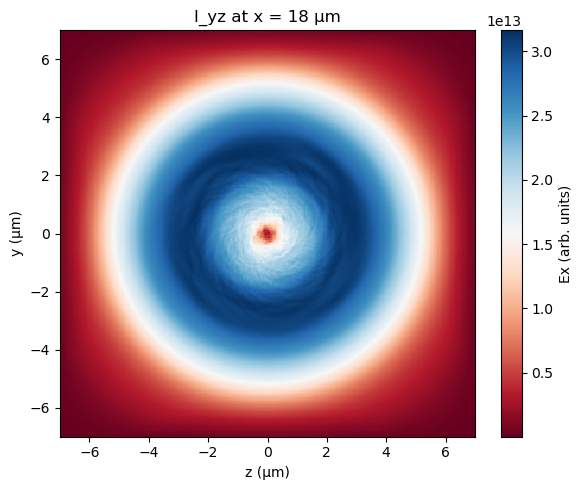

In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_name = 'field0008.sdf'
file_path0 = os.path.join(base_dir0, file_name)

# === 加载字段数据 ===
result = load_field(file_path0)
Ex = result['Ex'] 
Ey = result['Ey'] 
Ez = result['Ez'] 
x = result['x']
y = result['y']
z = result['z']

I = np.sqrt(Ex**2+Ey**2+Ez**2)


# === 取 x = 18 μm 截面 ===
x_target = 22e-6
x_index = np.argmin(np.abs(x - x_target))
# Ey_yz = Ey[x_index, :, :]  # shape: (Ny, Nz)
I_yz = I[x_index, :, :]  # shape: (Ny, Nz)

# === 构造 y-z 网格 ===
Y, Z = np.meshgrid(y, z, indexing='ij')  # shape: (Ny, Nz)

# === 绘图 ===
plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(Z * 1e6, Y * 1e6, I_yz, shading='auto', cmap='RdBu')
plt.colorbar(pcm, label='Ex (arb. units)')
plt.xlabel('z (μm)')
plt.ylabel('y (μm)')
plt.title('I_yz at x = 18 μm')
plt.tight_layout()
plt.show()


# === 物理常数 ===
e = 1.602e-19
m_e = 9.109e-31
c = 3e8
epsilon_0 = 8.854e-12
wavelength = 0.8e-6
omega = 2 * np.pi * c / wavelength

# === 数值计算强度梯度 ===
dz = z[1] - z[0]
dy = y[1] - y[0]
grad_Iz = np.gradient(I, dz, axis=1)  # z方向
grad_Iy = np.gradient(I, dy, axis=0)  # y方向

# === 有质动力计算 ===
prefactor = - (e**2) / (2 * m_e * omega**2 * c * epsilon_0)
Fp_z = prefactor * grad_Iz  # z方向分量
Fp_y = prefactor * grad_Iy  # y方向分量

# === 构造网格 ===
Z, Y = np.meshgrid(z, y, indexing='xy')  # shape 和 I 保持一致

# === 绘制有质动力矢量图 ===
plt.figure(figsize=(8, 6))
plt.quiver(Z * 1e6, Y * 1e6, Fp_z, Fp_y, scale=1e-23, color='blue')
plt.title('Ponderomotive Force Field at x = 18 μm')
plt.xlabel('z (μm)')
plt.ylabel('y (μm)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()


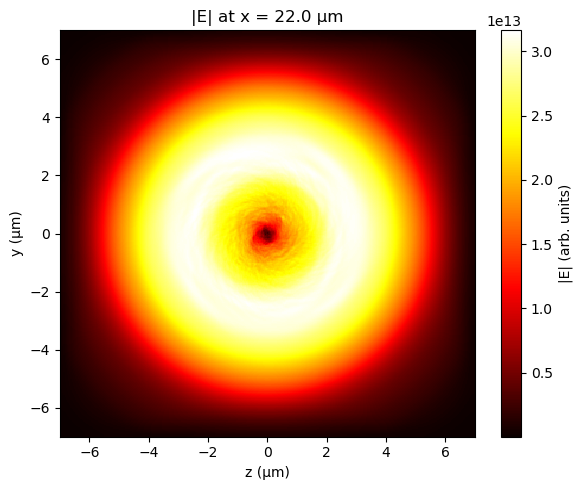

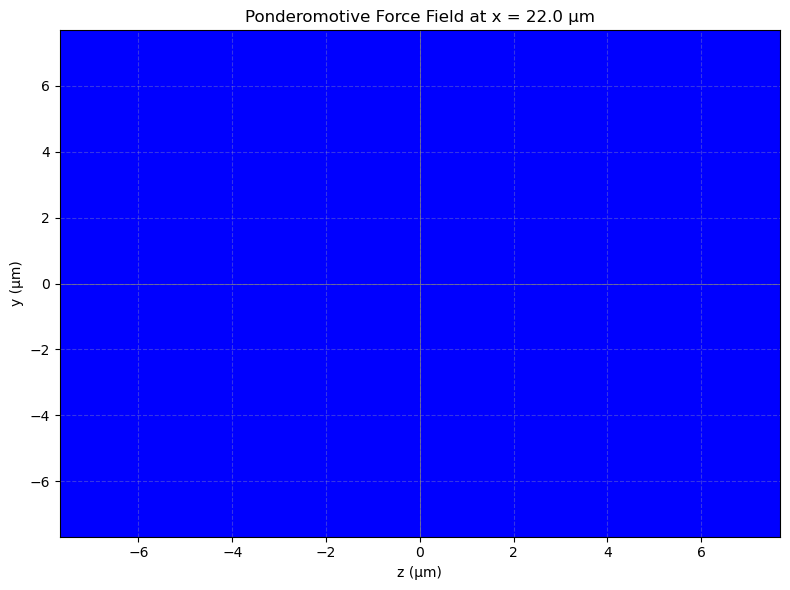

In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_name = 'field0008.sdf'
file_path0 = os.path.join(base_dir0, file_name)

# === 加载字段数据 ===
result = load_field(file_path0)
Ex = result['Ex'] 
Ey = result['Ey'] 
Ez = result['Ez'] 
x = result['x']
y = result['y']
z = result['z']

# === 光强计算 ===
I = np.sqrt(Ex**2 + Ey**2 + Ez**2)

# === 取 x = 22 μm 截面 ===
x_target = 22e-6
x_index = np.argmin(np.abs(x - x_target))
I_yz = I[x_index, :, :]  # shape: (Ny, Nz)

# === 构造 y-z 网格 ===
Y, Z = np.meshgrid(y, z, indexing='ij')  # 注意这里 indexing='ij' 是为了与 I_yz 对齐

# === 绘制强度图像 ===
plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(Z * 1e6, Y * 1e6, I_yz, shading='auto', cmap='hot')
plt.colorbar(pcm, label='|E| (arb. units)')
plt.xlabel('z (μm)')
plt.ylabel('y (μm)')
plt.title(f'|E| at x = {x[x_index]*1e6:.1f} μm')
plt.tight_layout()
plt.show()

# === 物理常数 ===
e = 1.602e-19
m_e = 9.109e-31
c = 3e8
epsilon_0 = 8.854e-12
wavelength = 0.8e-6
omega = 2 * np.pi * c / wavelength

# === 计算强度梯度（在 y-z 平面）===
dz = z[1] - z[0]
dy = y[1] - y[0]
grad_Iz = np.gradient(I_yz, dz, axis=1)  # z方向
grad_Iy = np.gradient(I_yz, dy, axis=0)  # y方向

# === 计算有质动力 ===
prefactor = - (e**2) / (2 * m_e * omega**2 * c * epsilon_0)
Fp_z = prefactor * grad_Iz  # z方向分量
Fp_y = prefactor * grad_Iy  # y方向分量


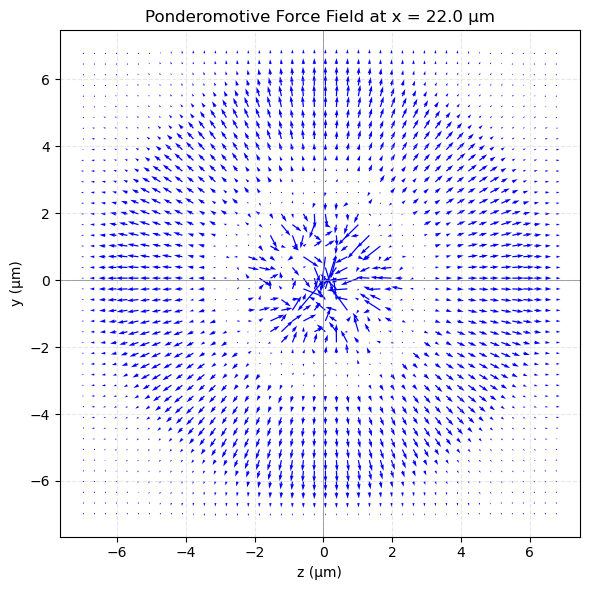

In [19]:
# 设置采样间隔，比如每隔 4 个点取一个
step = 8

plt.figure(figsize=(6, 6))
plt.quiver(
    Z[::step, ::step] * 1e6,  # z
    Y[::step, ::step] * 1e6,  # y
    Fp_z[::step, ::step],    # z方向分量
    Fp_y[::step, ::step],    # y方向分量
    scale=5e-16, color='blue'
)
plt.title(f'Ponderomotive Force Field at x = {x[x_index]*1e6:.1f} μm')
plt.xlabel('z (μm)')
plt.ylabel('y (μm)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()


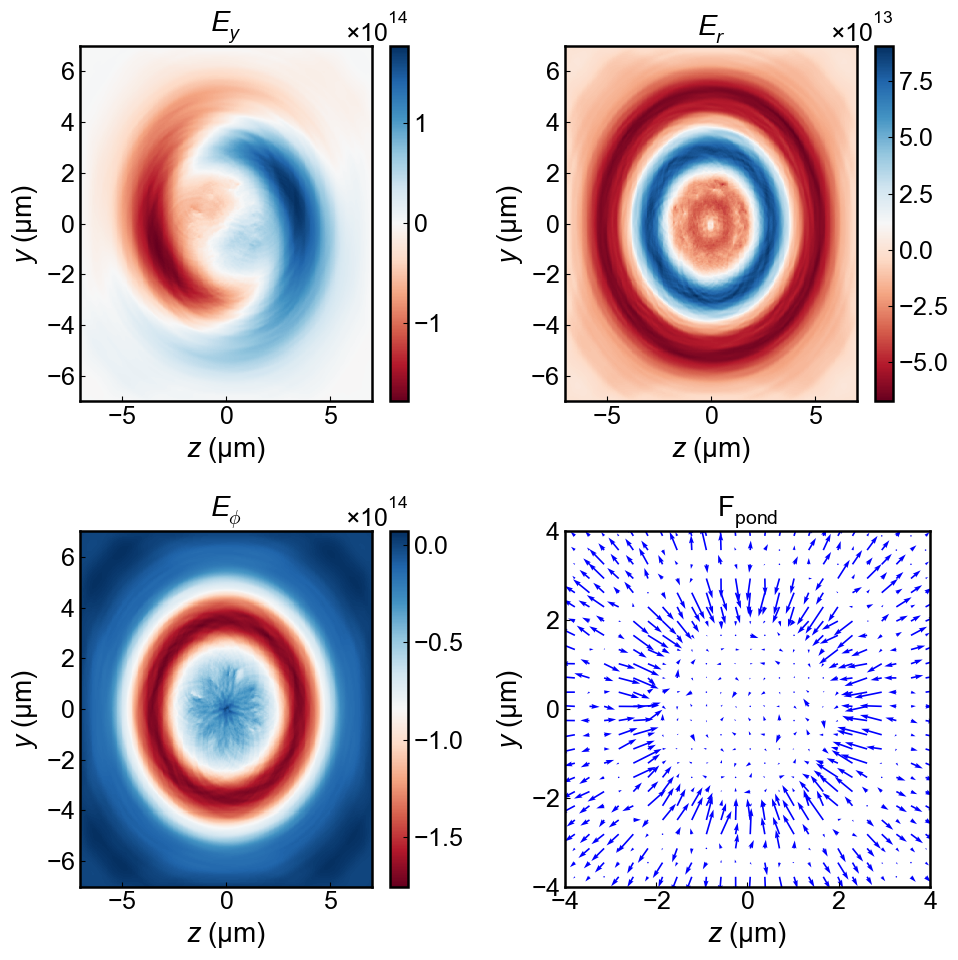

In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *
import matplotlib as mpl

plt.rcParams.update({
    'font.family': ['Arial'],           # 字体优先使用 Arial，找不到时用 SimHei（支持中文）
    'font.size': 20,                              # 基础字体大小
    'axes.labelsize': 20,                         # 坐标轴标签字体大小
    'axes.titlesize': 20,                         # 坐标轴标题字体大小
    'xtick.labelsize': 18,                        # x 轴刻度标签字体大小
    'ytick.labelsize': 18,                        # y 轴刻度标签字体大小
    'legend.fontsize': 18,                        # 图例字体大小
    'mathtext.fontset': 'custom',                 # 使用自定义数学字体配置
    'mathtext.rm': 'Arial',                       # 数学文本正常字体用 Arial
    'mathtext.it': 'Arial:italic',                # 数学文本斜体用 Arial Italic
    'mathtext.bf': 'Arial:bold',                   # 数学文本粗体用 Arial Bold
    'xtick.direction': 'in',                      # x 轴刻度朝内
    'ytick.direction': 'in',                      # y 轴刻度朝内
})

# === 文件路径 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米'
file_name = 'field0009.sdf'
file_path = os.path.join(base_dir, file_name)

# === 读取电场数据 ===
result = load_field(file_path)
Ey = result['Ey']
Ez = result['Ez']
x = result['x']
y = result['y']
z = result['z']

# === 截取 x = 22.45 μm 平面 ===
x_target = 22.45e-6
x_index = np.argmin(np.abs(x - x_target))
Ey_slice = Ey[x_index, :, :]
Ez_slice = Ez[x_index, :, :]

# === 网格 & 极角 ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 笛卡尔 -> 柱坐标转换 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er, Ephi = cartesian_to_polar_field(Ey_slice, Ez_slice, phi)

# === 强度 & 梯度 ===
I_yz = Ey_slice**2 + Ez_slice**2
dz = z[1] - z[0]
dy = y[1] - y[0]
grad_Iz = np.gradient(I_yz, dz, axis=1)
grad_Iy = np.gradient(I_yz, dy, axis=0)

# === 有质动力计算 ===
e = 1.602e-19
m_e = 9.109e-31
c = 3e8
epsilon_0 = 8.854e-12
wavelength = 0.8e-6
omega = 2 * np.pi * c / wavelength

prefactor = - (e**2) / (2 * m_e * omega**2 * c * epsilon_0)
Fp_z = prefactor * grad_Iz
Fp_y = prefactor * grad_Iy

# === 三图 + 矢量图绘制 ===
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 网格
axs = axs.flatten()  # 方便用索引 axs[0] 到 axs[3]

# 图1：Ey
im1 = axs[0].pcolormesh(z*1e6, y*1e6, Ey_slice, shading='auto', cmap='RdBu', rasterized=True)
axs[0].set_title('$E_y$')
axs[0].set_xlabel('$z$ (μm)')
axs[0].set_ylabel('$y$ (μm)')
fig.colorbar(im1, ax=axs[0])

# 图2：Er
im2 = axs[1].pcolormesh(z*1e6, y*1e6, Er, shading='auto', cmap='RdBu', rasterized=True)
axs[1].set_title('$E_r$')
axs[1].set_xlabel('$z$ (μm)')
axs[1].set_ylabel('$y$ (μm)')
fig.colorbar(im2, ax=axs[1])

# 图3：Ephi
im3 = axs[2].pcolormesh(z*1e6, y*1e6, Ephi, shading='auto', cmap='RdBu', rasterized=True)
axs[2].set_title('$E_\\phi$')
axs[2].set_xlabel('$z$ (μm)')
axs[2].set_ylabel('$y$ (μm)')
fig.colorbar(im3, ax=axs[2])

# 图4：仅绘制有质动力箭头
axs[3].set_facecolor('white')  # 白底
axs[3].quiver(z[::8]*1e6, y[::8]*1e6, Fp_z[::8, ::8], Fp_y[::8, ::8],
              color='blue', scale=0.5, width=0.0045)
axs[3].set_title(r'$\mathrm{F_{pond}}$')
axs[3].set_xlabel('$z$ (μm)')
axs[3].set_ylabel('$y$ (μm)')
axs[3].set_xlim(-4, 4)
axs[3].set_ylim(-4, 4)

plt.tight_layout()
plt.savefig("/media/lan/Lexar/my_project/test/1.pdf",format="pdf",dpi=600)
plt.show()